# Python 的 50+ 練習：資料科學學習手冊

> Python 進階資料視覺化

[數聚點](https://www.datainpoint.com) | 郭耀仁 <https://linktr.ee/yaojenkuo>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Python 進階資料視覺化第三方模組

## Python 資料視覺化工具盤點

- "Wrangle"：[Pandas](https://pandas.pydata.org/docs/index.html)
- 探索性分析與溝通分享：
    - 靜態：[Matplotlib](https://matplotlib.org/)、[Seaborn](https://seaborn.pydata.org/)
    - 地理資訊：[GeoPandas](https://geopandas.org/en/stable/)、[Folium](https://python-visualization.github.io/folium/)
    - 動態：[Plotly](https://plotly.com/)
    - 網頁應用程式：[Dash](https://plotly.com/dash/)、[Streamlit](https://streamlit.io/)

## GeoPandas、Folium

## 什麼是 GeoPandas

> GeoPandas 是 Python 的第三方模組，基於 Pandas、Shapely、Fiona 與 Matplotlib 等模組，能夠讓使用者更輕鬆地處理地理空間資料、建立地理資料視覺化。

來源：<https://geopandas.org/en/stable>

## 什麼是 Folium

> Folium 是 Python 的第三方地理資料視覺化模組，基於 leaflet.js，能夠讓使用者更輕鬆地建立具備互動功能的地理資料視覺化。

來源：<https://python-visualization.github.io/folium>

## 根據說明文件的範例載入

來源：<https://geopandas.org/en/stable/getting_started/introduction.html>、<https://python-visualization.github.io/folium/quickstart.html#Getting-Started>

In [2]:
import geopandas as gpd
import folium

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(gpd.__version__)
print(gpd.__file__)
print(folium.__version__)
print(folium.__file__)

0.11.0
/Users/kuoyaojen/opt/miniconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/__init__.py
0.12.1.post1
/Users/kuoyaojen/opt/miniconda3/envs/geo_env/lib/python3.10/site-packages/folium/__init__.py


## 如果環境中沒有安裝 GeoPandas，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'geopandas'
```

## GeoPandas 的模組依賴性強，可以建立一個專用環境 `geo_env`

```bash
conda create -n geo_env
conda activate geo_env
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 geopandas
```

## 如果環境中沒有安裝 Folium，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'folium'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install folium` 或者 `conda install folium -c conda-forge` 指令安裝

若要指定模組版本可以加上 `==MAJOR.MINOR.PATCH` 課程使用的模組版本為 0.12

```bash
pip install folium==0.12
```
或者

```bash
conda install folium==0.12 -c conda-forge
```

## 建立 GeoDataFrame 

In [4]:
csv_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
df = pd.read_csv(csv_url)
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df["Long_"], df["Lat"]))
print(type(df))
print(type(gdf))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [5]:
gdf.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,geometry
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0,POINT (67.70995 33.93911)
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0,POINT (20.16830 41.15330)
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN,POINT (23.34700 -71.94990)
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0,POINT (1.65960 28.03390)
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0,POINT (1.52180 42.50630)


## 使用 GeoDataFrame 物件的 `plot()` 方法

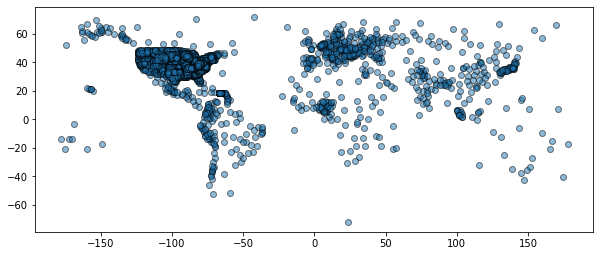

In [6]:
ax = gdf.plot(figsize=(10, 5), alpha=0.5, edgecolor='k')
plt.show()

## 添加背景

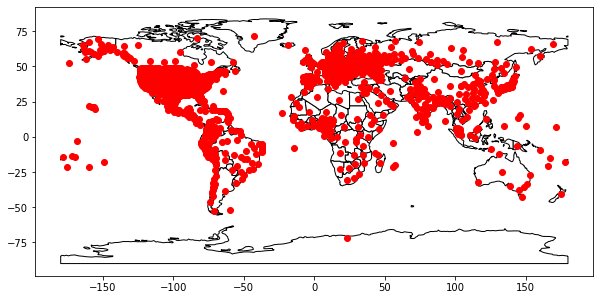

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 5), color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()

## 建立分級著色圖

- 載入 GeoJSON 為 `GeoDataFrame`
- 和數值 `DataFrame` 關聯。
- 繪製分級著色圖。

In [8]:
world_countries = gpd.read_file("https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json")
print(type(world_countries))
world_countries.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


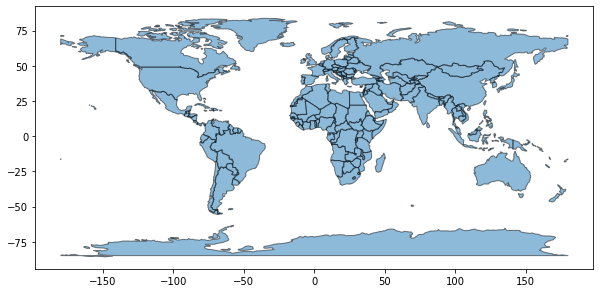

In [9]:
ax = world_countries.plot(figsize=(10, 5), alpha=0.5, edgecolor='k')
plt.show()

In [10]:
daily_report = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-30-2022.csv")
lookup_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")
daily_report_lookup_table = pd.merge(daily_report[["Combined_Key", "Confirmed", "Deaths"]], lookup_table, on="Combined_Key")
daily_report_lookup_table.head()

,Combined_Key,Confirmed,Deaths,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Population
0,Afghanistan,182528,7723,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,38928341.0
1,Albania,280851,3500,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,2877800.0
2,Algeria,266087,6875,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,43851043.0
3,Andorra,43774,153,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,77265.0
4,Angola,101320,1900,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,32866268.0


## 和數值 DataFrame 關聯

In [11]:
sum_by_country = daily_report_lookup_table.groupby("iso3")[["Confirmed", "Deaths", "Population"]].sum().reset_index()
incidence_rate = sum_by_country["Confirmed"]*100000 / sum_by_country["Population"]
sum_by_country = sum_by_country.assign(incidence_rate=incidence_rate)
sum_by_country = sum_by_country[np.isfinite(sum_by_country["incidence_rate"])]
gdf_choropleth = pd.merge(world_countries, sum_by_country, left_on="id", right_on="iso3")
print(type(gdf_choropleth))
gdf_choropleth.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry,iso3,Confirmed,Deaths,Population,incidence_rate
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",AFG,182528,7723,38928341.0,468.882041
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",AGO,101320,1900,32866268.0,308.279601
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",ALB,280851,3500,2877800.0,9759.225797
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,945800,2316,9890400.0,9562.808380
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",ARG,9367172,129070,45195777.0,20725.768250


## 繪製分級著色圖

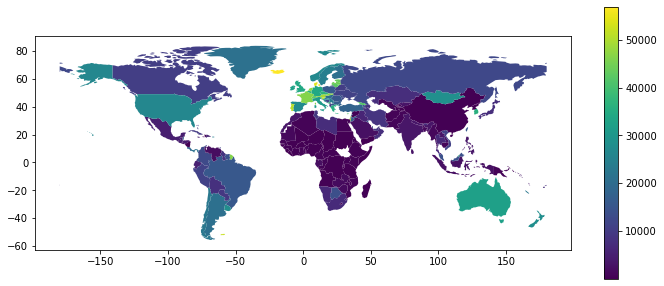

In [12]:
gdf_choropleth.plot(figsize=(12, 5), column="incidence_rate", legend=True)
plt.show()

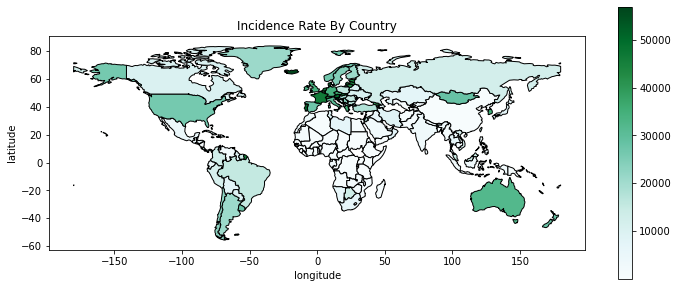

In [13]:
ax = gdf_choropleth.plot(figsize=(12, 5), column="incidence_rate",
                         cmap="BuGn", edgecolor="black", legend=True)
ax.set_title("Incidence Rate By Country")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
plt.show()

## 建立 Folium 地圖

- 兩種內建地圖圖層：
    - OpenStreetMap
    - Stamen

In [14]:
# OpenStreetMap
m = folium.Map(location = [25, 121.5], tiles = "OpenStreetMap", zoom_start = 10)
m

In [15]:
# Stamen Terrain
m = folium.Map(location = [25, 121.5], tiles = "Stamen Terrain", zoom_start = 10)
m

In [16]:
# Stamen Toner
m = folium.Map(location = [25, 121.5], tiles = "Stamen Toner", zoom_start = 10)
m

## 在 Folium 地圖上添加標記

In [17]:
gdf_list = []
popup_list = []
for point, combined_key in zip(gdf["geometry"], gdf["Combined_Key"]):
    try:
        element = [point.xy[1][0], point.xy[0][0]]
        popup_list.append(combined_key)
        gdf_list.append(element)
    except:
        continue
m = folium.Map(location = [0, 0], tiles = "Stamen Terrain", zoom_start = 2)
for coordinates, combined_key in zip(gdf_list, popup_list):
    m.add_child(folium.Marker(location=coordinates,
                              popup=combined_key))

In [18]:
#m

## 建立 Folium 熱圖

In [19]:
from folium import plugins

m = folium.Map(location = [30, 15], tiles='Cartodb dark_matter', zoom_start=2)
plugins.HeatMap(gdf_list).add_to(m)

In [20]:
m

## 建立 Folium 分級著色圖

In [21]:
m = folium.Map(location=[30, 15], tiles="CartoDB positron", zoom_start=2)
folium.Choropleth(geo_data=gdf_choropleth,
                  name='geometry',
                  data=gdf_choropleth,
                  columns=['name', 'incidence_rate'],
                  key_on='feature.properties.name',
                  fill_color='BuGn',
                  fill_opacity=0.75,
                  line_opacity=0.5,
                  legend_name='Incidence Rate By Country').add_to(m)

In [22]:
m

## Plotly

## 什麼是 Plotly

> Plotly 是 Python 的第三方模組，基於 plotly.js 能夠讓使用者更輕鬆地建立具備互動功能的資料視覺化。

來源：<https://plotly.com/python/getting-started>

## 根據說明文件的範例載入

來源：<https://plotly.com/python/getting-started>

In [23]:
import plotly.express as px

## 如果環境中沒有安裝 plotly，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'plotly'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install plotly` 或者 `conda install -c plotly plotly` 指令安裝

若要指定模組版本可以加上 `==MAJOR.MINOR.PATCH` 課程使用的模組版本為 5.9

```bash
pip install plotly==5.9
```
或者

```bash
conda install plotly==5.9 -c conda-forge
```

## 建立 Plotly 長條圖

In [26]:
fig = px.bar(gdf_choropleth.sort_values("incidence_rate", ascending=False).head(10),
             x="incidence_rate", y="name", color="name")
fig.show()

## 建立 Plotly 散佈圖

In [28]:
fig = px.scatter(gdf_choropleth, x="Confirmed", y="Deaths", color="name",
                 size='Population', hover_data=['name', 'Confirmed', 'Deaths'])
fig.show()

## 建立 Plotly 地圖

In [35]:
# Plotting with Plotly
sum_by_combined_key = daily_report_lookup_table.groupby(["Combined_Key", "Lat", "Long_"])[["Confirmed", "Population"]].sum().reset_index()
incidence_rate = sum_by_combined_key["Confirmed"]*100000 / sum_by_combined_key["Population"]
sum_by_combined_key = sum_by_combined_key.assign(incidence_rate=incidence_rate)
sum_by_combined_key = sum_by_combined_key[np.isfinite(sum_by_combined_key["incidence_rate"])]

In [38]:
fig = px.scatter_mapbox(sum_by_combined_key, lat="Lat", lon="Long_",
                        size="incidence_rate", color="incidence_rate",
                        size_max=50, mapbox_style="carto-positron", zoom=1, hover_name="Combined_Key")
fig.show()

## Streamlit

## 什麼是 Streamlit

> Streamlit 是 Python 的第三方模組，能夠讓使用者使用 `.py` 文件輕鬆地建立具備資料視覺化的網頁應用程式（俗稱儀表板）。

來源：<https://streamlit.io/>

## 根據說明文件的範例載入

```python
import streamlit as st
```

來源：<https://docs.streamlit.io/library/get-started/create-an-app>

## 如果環境中沒有安裝 GeoPandas，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'streamlit'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install streamlit` 指令安裝

```bash
pip install streamlit
```

## Streamlit Gallery: Interactive table

<>